# Problem 2: The AS-AD Model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **exante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [22]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

In [67]:
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Question 1
Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$.

In [37]:
# Defining the AD and the SRAS functions

# i. Defining symbols
sm.init_printing(use_unicode=True)
pit = sm.symbols('pi_t')
pit1 = sm.symbols('pi_t-1')
alpha = sm.symbols('alpha')
gamma = sm.symbols('gamma')
phi = sm.symbols('phi')
h = sm.symbols('h')
b = sm.symbols('b')
vt = sm.symbols('v_t')
yt = sm.symbols('y_t')
yt1 = sm.symbols('y_t-1')
st = sm.symbols('s_t')
st1 = sm.symbols('s_t-1')


# ii. AD-curve 
AD = sm.Eq(1/(h*alpha)*(vt-(1+b*alpha)*yt), pit)

# iii. SRAS-curve 
SRAS = sm.Eq(pit1 + gamma*yt - phi*gamma*yt1 + st - phi*st1, pit)



The equilibrium value of y is:


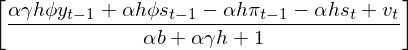

In [38]:
# Solving for y

# i. Setting AD equal to SRAS 
AD_SRAS = sm.Eq(1/(h*alpha)*(vt-(1+b*alpha)*yt), pit1 + gamma*yt - phi*gamma*yt1 + st - phi*st1)

# ii. Solving for y 
yt_star = sm.solve(AD_SRAS, yt)

# iii. Printing y*
print(f'The equilibrium value of y is:')
yt_star

The equilibrium value of pi is:


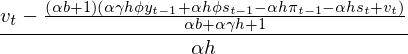

In [54]:
# Solving for pi 

# i. Inserting y* in the AD function
pit_star = 1/(h*alpha)*(vt-(1+b*alpha)*yt_star[0])

# ii. Printing pi*
print(f'The equilibrium value of pi is:')
pit_star

## Question 2
Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

In [98]:
# Defining variable values 
yt1_int = 0 
pit1_int = 0 
vt_int = 0 
st_int = 0 
st1_int = 0 

vt_one = 0.1


## Solving numerically for y 

# a. Defining a lambda function of yt_eq 
_sol_y_func = sm.lambdify((h,b,alpha,gamma,phi,vt,st,pit1,yt1,st1),yt_star[0])

# b. Defining a function which solve for y, given values and parameters 
def sol_y_func(vt,st,pit1,yt1,st1,h=par['h'],alpha=par['alpha'],b=par['b'],gamma=par['gamma'],phi=par['phi']):
    return _sol_y_func(h,b,alpha,gamma,phi,vt,st,pit1,yt1,st1)

# c. Solving for y and printing the solution 
y_star = sol_y_func(vt=vt_int,st=st_int,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
print(f'The equilibrium value of y, given variable values and parameters is: {y_star}')



##  Solving for pi 

# a. Defining a lambda function of yt_eq 
_sol_pi_func = sm.lambdify((h,b,alpha,gamma,phi,yt,vt,st,pit1,yt1,st1),pit_star)

# b. Defining a function which solve for pi, given values and parameters
def sol_pi_func(vt,st,yt,pit1,yt1,st1,h=par['h'],alpha=par['alpha'],b=par['b'],gamma=par['gamma'],phi=par['phi']):
    return _sol_pi_func(h,b,alpha,gamma,phi,vt,st,yt,pit1,yt1,st1)

# c. Solving for pi, using the value of y_star, and printing the solution 
pi_star = sol_pi_func(vt=vt_int,st=st_int,yt=y_star,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
print(f'The equilibrium value of pi, given variable values and parameters is: {pi_star}')



The equilibrium value of y, given variables values and parameters is: 0.0
The equilibrium value of pi, given variables values and parameters is: 0.0


In [ ]:
# Illustration 

# Define AD and SRAS curves as functions
def AD_curve(h,b,alpha,vt,yt): 
    return 1/(h*alpha)*(vt-(1+b*alpha)*yt)
                        
                        
def SRAS_curve(gamma,phi,pit1,yt,yt1,st,st1): 
    return pit1+gamma*yt-phi*gamma*yt1+st-phi*st1

In [238]:
# Constructing graph

def harry(vt_val): 
    # a. Finding equilibrium given vt
    y_opt = sol_y_func(vt=vt_val,st=st_int,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
    pi_opt = sol_pi_func(vt=vt_val,st=st_int,yt=y_star,pit1=pit1_int,yt1=yt1_int,st1=st1_int)
    
    # b. Constructing curves 
    y = np.linspace(-0.1,0.1,100)
    AD = AD_curve(h=par['h'],b=par['b'],alpha=par['alpha'],vt=vt_val,yt=y)
    SRAS = SRAS_curve(gamma=par['gamma'],phi=par['phi'],pit1=pit1_int,yt1=yt1_int,st=st_int,st1=st1_int,yt=y)

    # c. Generating graph
    plt.plot(y,AD,label='AD')
    plt.plot(y,SRAS,label='SRAS')
    plt.grid(True)

    plt.title('AD and SRAS')
    plt.xlabel('$y_t$')
    plt.ylabel('$\pi_t$')

    # c. Add lines which show optimal values of y and pi 
    plt.axvline(y_opt, linestyle='dashed', color="pink", label='$y^*$')
    plt.axhline(pi_opt, linestyle='dashed', color="blue", label='$\pi^*$')
    
    plt.legend()


# Interactive graph
def ron(): 
    widgets.interact(harry, 
                     vt_val=widgets.IntSlider(
                         value=0, 
                         description='Value of $v_t$', 
                         min=0,
                         max=0.1, 
                         step=0.01, 
                         disabled=False, 
                         continuous_update=False));

# ron()

def hermione(): 
    widgets.interact(harry, 
                    vt_val=widgets.Dropdown(
                    description='Value of $v_t$', 
                    options=[0,0.1], 
                    value=0),);
    
hermione();
    

interactive(children=(Dropdown(description='Value of $v_t$', options=(0, 0.1), value=0), Output()), _dom_class…

# NOTE: CHECK RON FUNKTIONEN - SLIDEREN VIRKER IKKE

Bare hvis vi vil bruge slideren. Alternativt kunne vi lave en Checkbox

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [131]:
par['delta'] = 0.80
par['omega'] = 0.15

## Question 3:
Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

In [424]:
# Constructing AR(1) processes 

# Defining intial values 
y1 = 0
pi_init = 0
s_init = 0

v_init = 0
x0 = 0.1
xt = 0 
ct = 0 

# Number of variable values 
num = 1000

# Creating list, contraining x number values of vt
vt = []
vt_num = par['delta'] * v_init + x0
vt.append(vt_num)
def v_func(number=num):
    """
    Function which creates list of vt values
    Args: 
        number = Number of values in list
    """
    for i in range(0,number): 
        vt_i = par['delta']*vt[i] + xt
        vt.append(vt_i)

v_func();
        
# Creating list, contraining x number values of st
st = []
st_num = par['omega']* s_init + ct
st.append(st_num)
def s_func(number=num): 
    """
    Function which creates list of st values
    Args: 
        number = Number of values in list
    """
    for i in range(0,number):
        st_i = par['omega']*st[i] + ct
        st.append(st_i)
        
s_func();

In [425]:
# Constructing list of y* and pi*


y_stars = [0]
pi_stars = [0]
AD = []
SRAS = []

def y_solve(number=num): 
    for i in range(1,num):
        # y 
        y_star_i = sol_y_func(vt=vt[i],st=st[i],pit1=pi_stars[i-1],yt1=y_stars[i-1],st1=st[i-1])
        y_stars.append(y_star_i)
        # Pi
        pi_star_i = sol_pi_func(vt=vt[i],st=st[i],yt=y_stars[i],pit1=pi_stars[i-1],yt1=y_stars[i-1],st1=st[i-1])
        pi_stars.append(pi_star_i)

y_solve();


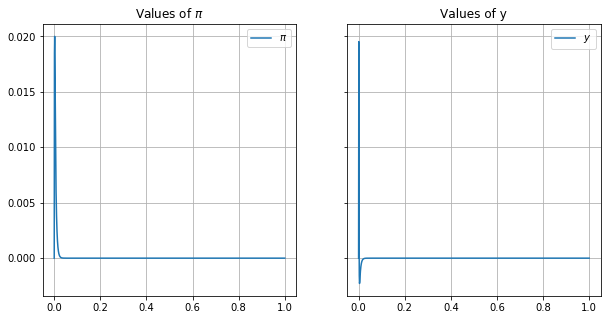

In [426]:
# Illustrating the evolution of the economy 

x = np.linspace(0,1,1000)
y_value = y_stars
pi_value = pi_stars 

# Constructing graph
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))
ax1.plot(x,pi_value, label='$\pi$')
ax1.set_title('Values of $\pi$')
# ax1.ylabel('$\pi_t$')
ax1.grid(True)
ax1.legend()
ax2.plot(x,y_value, label="$y$")
ax2.set_title('Values of y')
# ax2.ylabel('$y_t$')
ax2.grid(True)
ax2.legend()

plt.show();


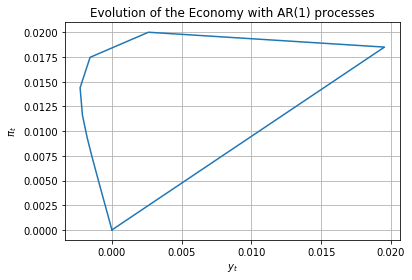

In [427]:
# Illustrating the evolution of the economy 
x = y_stars
y = pi_stars 


plt.plot(x,y)
plt.grid(True)

plt.title("Evolution of the Economy with AR(1) processes")
plt.xlabel('$y_t$')
plt.ylabel('$\pi_t$')
    
plt.show();

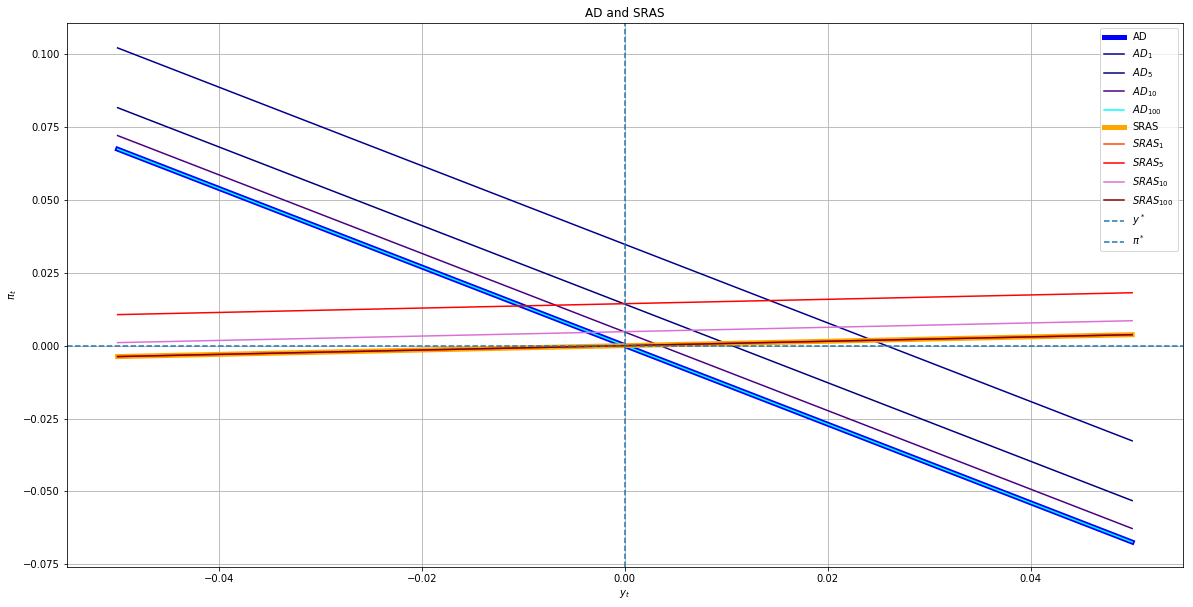

In [459]:
# Illustrating moves in AD and SRAS curves 

# a. Shocks and Convergence in AD and SRAS curves 
def AD_shock(yt,period, h=par['h'],b=par['b'],alpha=par['alpha'],vt=vt): 
    """Function which generates AD curves following a shock
    Args: 
        h: Parameter 
        b: Parameter 
        alpha: Parameter 
        vt: Vector of shocks
        yt: Vector of y values
        period: Number of periods after initial shock
    """
    if period == 0: 
        return 1/(h*alpha)*(0-(1+b*alpha)*yt)
    else:
        return 1/(h*alpha)*(vt[period-1]-(1+b*alpha)*yt)
    
def SRAS_shock(yt,period,gamma=par['gamma'],phi=par['phi'],st=st): 
    """Function which generates SRAS curves following a shock
    Args: 
        gamma: Parameter
        phi: Parameter
        pi: Vector of pi values
        yt: Vector of y values
        st: Vector of shocks
        period: Number of periods after initial shock 
        """
    if period == 0: 
        return pi_init + gamma*yt - phi*y1 + st[period] - phi*s_init
    else:
        y_values = [0]
        pi_values = [0]
        for i in range(1,num): 
            y_val_i = sol_y_func(vt=vt[i],st=st[i],pit1=pi_stars[i-1],yt1=y_stars[i-1],st1=st[i-1])
            y_values.append(y_val_i)
            pi_val_i = sol_pi_func(vt=vt[i],st=st[i],yt=y_stars[i],pit1=pi_stars[i-1],yt1=y_stars[i-1],st1=st[i-1])
            pi_values.append(pi_val_i)
        return pi_values[period-1] + gamma*yt - phi*gamma*y_values[period-1] + st[period] - phi*st[period-1] 
        

# b. Constructing graph
axis_font = {'fontname':'Arial', 'size':'14'}

def sherlock(vt,st,ymax): 
    """Constructs figure of convergence in the economy following a shock
    Args: 
        vt: Vector of shocks
        st: Vector of shocks
        ymax: Maxmium value of y. Minimum value of y will become -ymax."""
    # i. Constructing curves 
    y = np.linspace(-ymax,ymax,100)
    AD_zero = AD_shock(y,0,vt=vt)
    AD_i = AD_shock(y,1,vt=vt)
    AD_v = AD_shock(y,5,vt=vt)
    AD_x = AD_shock(y,10,vt=vt)
    AD_c = AD_shock(y,100,vt=vt)
    AD_m = AD_shock(y,1000,vt=vt)
    
    SRAS_zero = SRAS_shock(y,0,st=st)
    SRAS_i = SRAS_shock(y,1,st=st)
    SRAS_v = SRAS_shock(y,5,st=st)
    SRAS_x = SRAS_shock(y,10,st=st)
    SRAS_c = SRAS_shock(y,100,st=st)
    
    # ii. Graphs
    # (a) AD curves
    plt.figure(figsize=(20,10))
    plt.plot(y,AD_zero,label=('AD'),linewidth=5,color='blue')
    plt.plot(y,AD_i,label='$AD_1$',color='darkblue')
    plt.plot(y,AD_v,label='$AD_5$',color='navy')
    plt.plot(y,AD_x,label='$AD_{10}$',color='indigo')
    plt.plot(y,AD_c,label='$AD_{100}$',color='aqua')
    
    # (b) SRAS curves
    plt.plot(y,SRAS_zero,label='SRAS',linewidth=5,color='orange')
    plt.plot(y,SRAS_i,label='$SRAS_1$',color='orangered')
    plt.plot(y,SRAS_v,label='$SRAS_5$',color='red')
    plt.plot(y,SRAS_x,label='$SRAS_{10}$',color='orchid')
    plt.plot(y,SRAS_c,label='$SRAS_{100}$',color='maroon')
    
    # (c) Graph properties 
    plt.grid(True)
    plt.title('AD and SRAS')
    plt.xlabel('$y_t$')
    plt.ylabel('$\pi_t$')

    # d. Add lines which show optimal values of y and pi 
    plt.axvline(y_star, linestyle='dashed', label='$y^*$')
    plt.axhline(pi_star, linestyle='dashed', label='$\pi^*$')
    
    plt.legend()
    
sherlock(vt,st,0.05)



**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [428]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

## Question 4
Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

In [429]:
# Constructing x and c
x = np.random.normal(0,par['sigma_x'],1000)
c = np.random.normal(0,par['sigma_c'],1000)

In [430]:
# New vt and st vecotr 

# a. Number of variable values 
num = 1000

# b. Creating list, contraining x number values of vt
vt_new = [0]
def v_func(number=num):
    """
    Function which creates list of vt values
    Args: 
        number = Number of values in list
    """
    for i in range(1,number): 
        vt_i = par['delta']*vt[i-1] + x[i]
        vt_new.append(vt_i)

v_func();
        
# c. Creating list, contraining x number values of st
st_new = [0]
def s_func(number=num): 
    """
    Function which creates list of st values
    Args: 
        number = Number of values in list
    """
    for i in range(1,number):
        st_i = par['omega']*st[i-1] + c[i]
        st_new.append(st_i)
        
s_func();

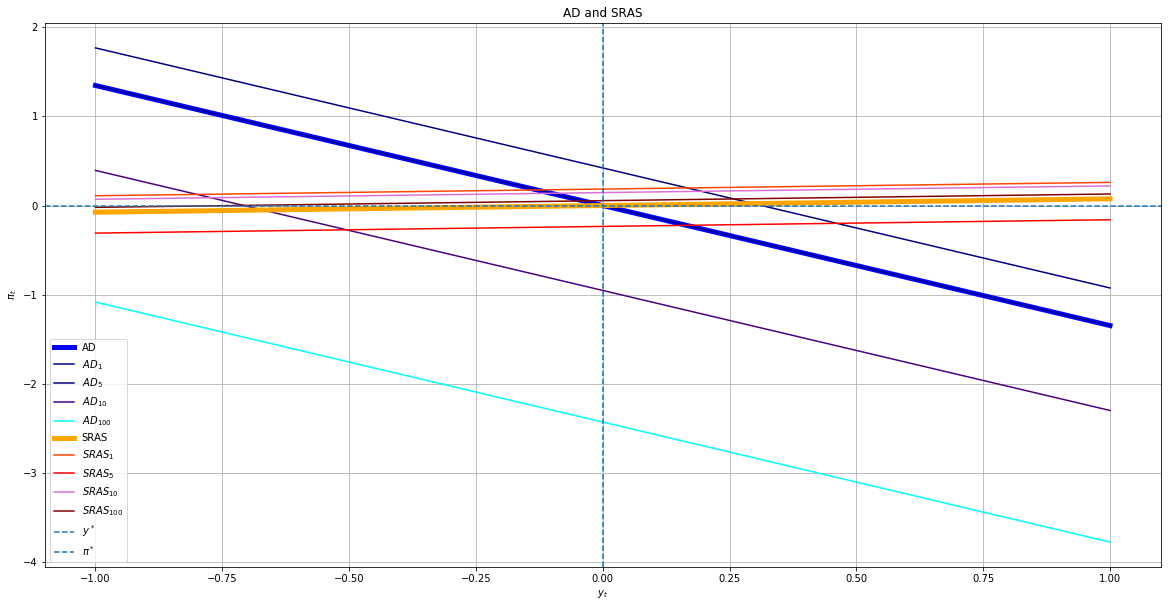

In [464]:
# Illustrating AD and SRAS curves with new shocks 

sherlock(vt_new,st_new, 1)

# Tilføj Equilibrium Path

In [467]:
# Simulating the Economy 

# Adding equilibrum values as initial values 
y_sim = [0]
pi_sim = [0]

for i in range(1,num): 
    y_val_i = sol_y_func(vt=vt_new[i],st=st[i],pit1=pi_stars[i-1],yt1=y_stars[i-1],st1=st[i-1])
    y_sim.append(y_val_i)
    pi_val_i = sol_pi_func(vt=vt_new[i],st=st_new[i],yt=y_stars[i],pit1=pi_stars[i-1],yt1=y_stars[i-1],st1=st_new[i-1])
    pi_sim.append(pi_val_i)

pi_sim